<a href="https://colab.research.google.com/github/diagonal-hamiltonian/repodynamite/blob/master/Tensorflow_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


Using the MNIST fashion dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_labels.shape, train_images.shape,test_images.shape, test_labels.shape

((60000,), (60000, 28, 28), (10000, 28, 28), (10000,))

The image data is stored in 28 by 28 arrays with pixel values 0-256. Label values are stored 0-9 so need to define class names.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

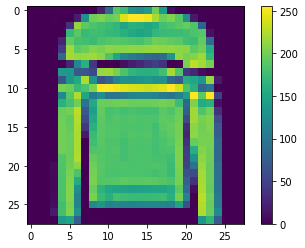

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

# Process/Normalize data
Must normalize pixels 0-255 -> 0-1.

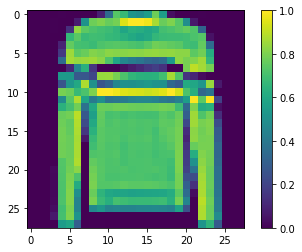

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

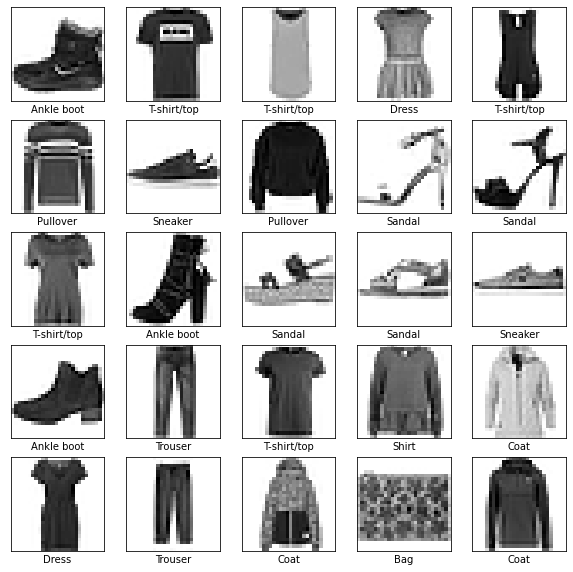

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

Setting up layers

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),#tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)#second (and last) layer returns a logits array with length of 10
])

In [ ]:
model.compile(optimizer='adam',#This is ana alternative to gradient descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']# accuracy, the fraction of the images that are correctly classified
              )

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5007 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3750 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3348 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3102 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2555 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2478 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

Need to check its accuracy on the test dataset.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2 )#Verbose visulasies the training process

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3365 - accuracy: 0.8841

Test accuracy: 0.8841000199317932


# Predictions
The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.



In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]
np.argmax(predictions[0])
test_labels[0]
class_names[9]

'Ankle boot'

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

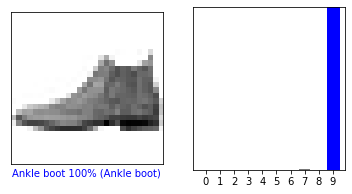

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

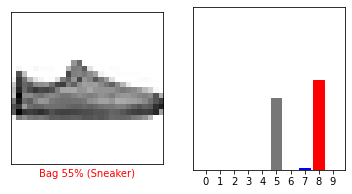

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

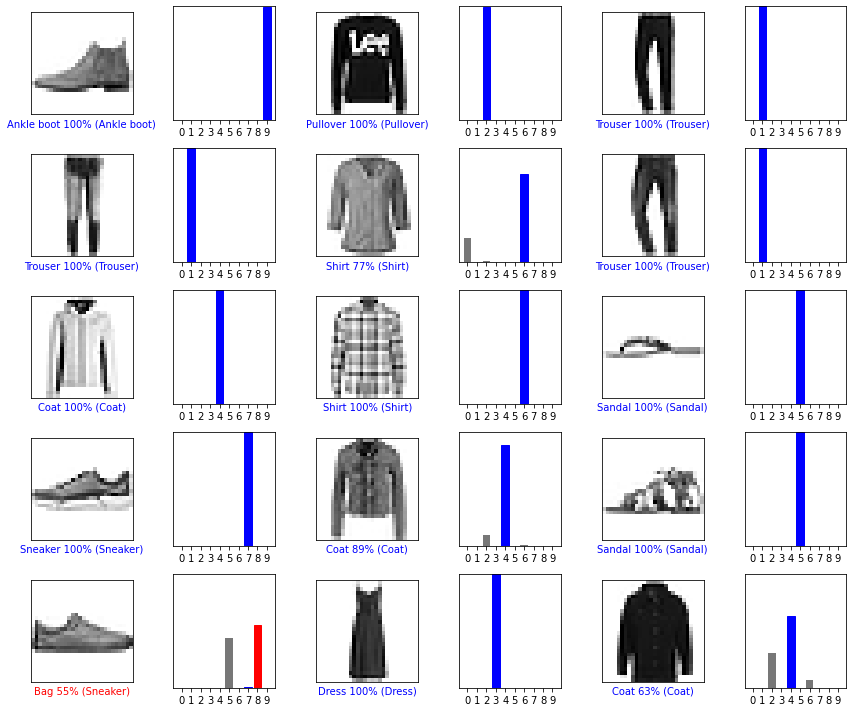

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Using the model to verify 1 image
